In [1]:
import pandas as pd
import numpy as np

names = ["word_freq_make",
"word_freq_address",
"word_freq_all",
"word_freq_3d",
"word_freq_our", 
"word_freq_over",
"word_freq_remove",
"word_freq_internet",
"word_freq_order",
"word_freq_mail",
"word_freq_receive",
"word_freq_will",
"word_freq_people",
"word_freq_report",
"word_freq_addresses",
"word_freq_free",
"word_freq_business",
"word_freq_email",
"word_freq_you",
"word_freq_credit",
"word_freq_your",
"word_freq_font",
"word_freq_000",
"word_freq_money",
"word_freq_hp",
"word_freq_hpl",
"word_freq_george",
"word_freq_650",
"word_freq_lab",
"word_freq_labs",
"word_freq_telnet",
"word_freq_857",
"word_freq_data",
"word_freq_415",
"word_freq_85",
"word_freq_technology",
"word_freq_1999",
"word_freq_parts",
"word_freq_pm",
"word_freq_direct",
"word_freq_cs",
"word_freq_meeting",
"word_freq_original",
"word_freq_project",
"word_freq_re",
"word_freq_edu",
"word_freq_table",
"word_freq_conference",
"char_freq_;", 
"char_freq_(",
"char_freq_[",
"char_freq_!",
"char_freq_$",
"char_freq_#",
"capital_run_length_average",
"capital_run_length_longest",
"capital_run_length_total",
"spam"]

podatki = pd.read_csv('spambase/spambase.data', header=None, index_col=False)
podatki.columns = names

In [2]:
print(podatki)

      word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0               0.00               0.64           0.64           0.0   
1               0.21               0.28           0.50           0.0   
2               0.06               0.00           0.71           0.0   
3               0.00               0.00           0.00           0.0   
4               0.00               0.00           0.00           0.0   
...              ...                ...            ...           ...   
4596            0.31               0.00           0.62           0.0   
4597            0.00               0.00           0.00           0.0   
4598            0.30               0.00           0.30           0.0   
4599            0.96               0.00           0.00           0.0   
4600            0.00               0.00           0.65           0.0   

      word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0              0.32            0.00              0.00     

In [3]:
from sklearn.model_selection import train_test_split
np.random.seed(0)

X = podatki.drop("spam", axis=1)
y = podatki["spam"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

pred = forest.predict(X_test)
acc = accuracy_score(y_test, pred)
print(f"Natančnost: {acc:.5f}")

Natančnost: 0.94897


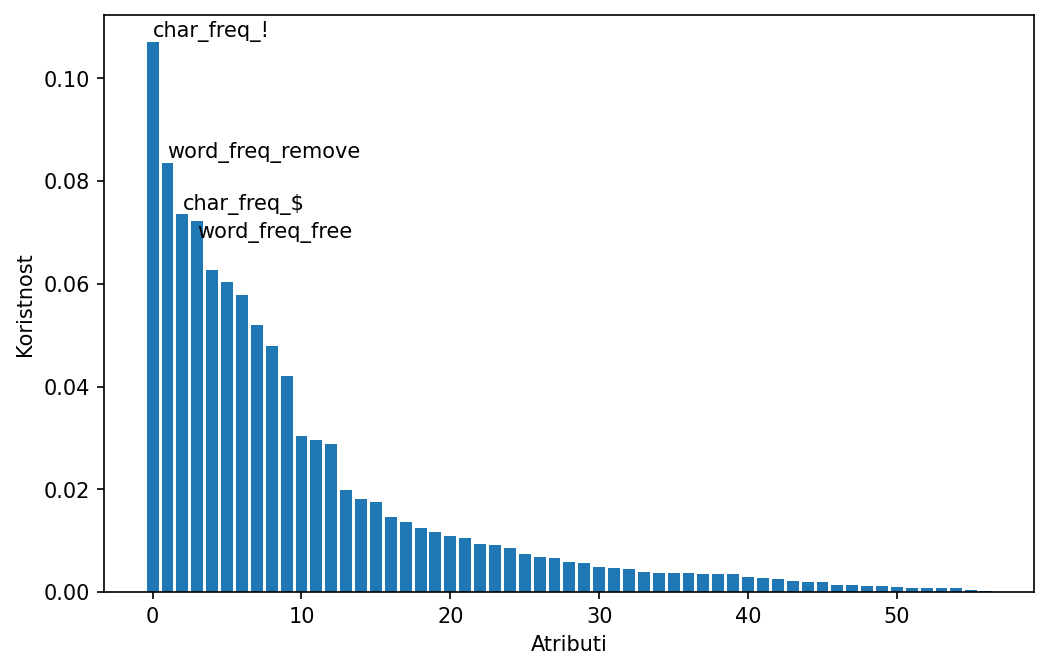

In [5]:
import matplotlib.pyplot as plt

imena_znacilk = X_train.columns
koristnost_znacilk = forest.feature_importances_
pomembnost = pd.DataFrame(koristnost_znacilk, imena_znacilk)

urejene = pomembnost.sort_values(0, ascending=False)
urejene_imena = urejene.index.tolist()

xs = range(len(urejene_imena))
plt.figure(figsize=(8,5), dpi=150)
plt.bar(xs, urejene[0])
for i in range(3):
    plt.text(i, urejene[0][i], urejene_imena[i], ha='left', va='bottom')
plt.text(3, urejene[0][3], urejene_imena[3], ha='left', va='top')

plt.xlabel("Atributi")
plt.ylabel("Koristnost")

plt.show()

In [6]:
print(urejene)

                                   0
char_freq_!                 0.107022
word_freq_remove            0.083530
char_freq_$                 0.073538
word_freq_free              0.072164
capital_run_length_average  0.062612
word_freq_your              0.060393
capital_run_length_longest  0.057846
word_freq_hp                0.051913
capital_run_length_total    0.047895
word_freq_money             0.042034
word_freq_you               0.030329
word_freq_000               0.029559
word_freq_our               0.028782
word_freq_edu               0.019825
word_freq_george            0.018032
word_freq_hpl               0.017465
word_freq_business          0.014513
word_freq_1999              0.013638
word_freq_all               0.012437
char_freq_(                 0.011642
word_freq_will              0.010943
word_freq_internet          0.010608
word_freq_re                0.009437
word_freq_receive           0.009216
word_freq_mail              0.008530
word_freq_email             0.007410
w

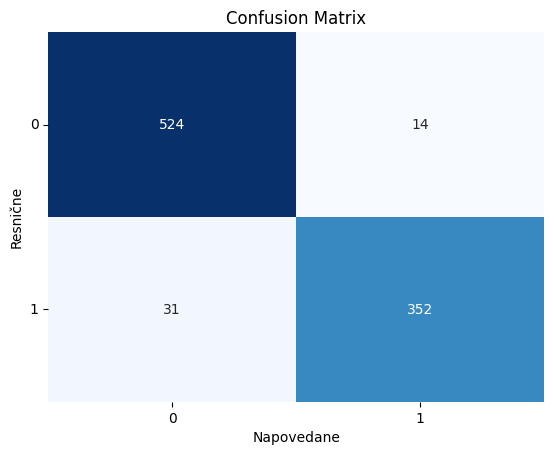

Število lažno pozitivnih: 14


In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion_mat = confusion_matrix(y_test, pred)
false_positives = confusion_mat[0, 1]

fig, ax = plt.subplots()

sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=[0, 1], yticklabels=[0, 1], ax=ax)

ax.set_yticklabels([0, 1], rotation=0)
ax.set_xlabel('Napovedane')
ax.set_ylabel('Resnične')
ax.set_title('Confusion Matrix')

plt.show()

print("Število lažno pozitivnih:", false_positives)


In [46]:
from sklearn.model_selection import GridSearchCV

hiperparametri = {
                  "max_depth": [None, 5, 10],
                  "min_samples_leaf": [1, 2, 5],
                  "class_weight": [{0: 1, 1: 1}, {0: 1, 1: 5}, {0: 1, 1: 7}, {0: 1, 1: 10}, {0: 1, 1: 15}]
                  }

gs = GridSearchCV(forest, hiperparametri, scoring="precision", cv=5, refit=True)
gs.fit(X_train, y_train)
gs.best_params_

{'class_weight': {0: 1, 1: 7}, 'max_depth': None, 'min_samples_leaf': 1}

In [47]:
forest_precise = RandomForestClassifier(random_state=0, class_weight={0: 1, 1: 7}, max_depth=None, min_samples_leaf=1)
forest_precise.fit(X_train, y_train)

pred = forest_precise.predict(X_test)
confusion_mat = confusion_matrix(y_test, pred)
false_positives = confusion_mat[0, 1]
acc = accuracy_score(y_test, pred)

print("Število lažno pozitivnih:", false_positives)
print(f"Natančnost: {acc:.5f}")

Število lažno pozitivnih: 15
Natančnost: 0.95005


In [53]:
hiperparametri = {"n_estimators": [100, 200, 300, 400],
                  "criterion": ["gini", "entropy"]
                  }

gs = GridSearchCV(forest, hiperparametri, scoring="accuracy", cv=5, refit=True)
gs.fit(X_train, y_train)
gs.best_params_

{'criterion': 'entropy', 'n_estimators': 100}

In [49]:
forest_best = RandomForestClassifier(random_state=0, n_estimators=100, criterion="entropy")
forest_best.fit(X_train, y_train)

pred = forest_best.predict(X_test)
acc = accuracy_score(y_test, pred)
print(f"Natančnost: {acc:.5f}")

Natančnost: 0.95114
